Эти карты позволяют визуализировать вклад каждого атома в похожесть между референсной молекулой и искомой молекулой

### Для начала нужно создать две молеклуы которые будут сравниваться

In [1]:
from rdkit import Chem

In [2]:
mol = Chem.MolFromSmiles("c1ccccc1")
ref_mol = Chem.MolFromSmiles("n1cncnc1")

In [5]:
from rdkit.Chem import Draw

In [22]:
lb = ["Benzol", "1,2,3-Triazin"]

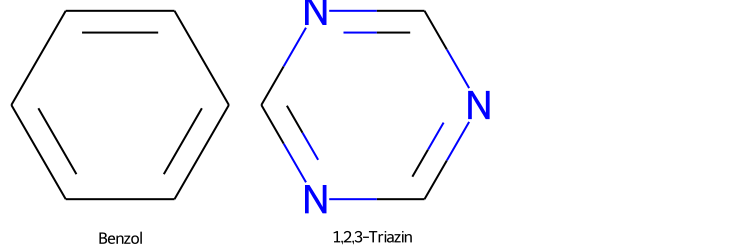

In [27]:
Draw.MolsToGridImage([mol, ref_mol], 
                     subImgSize = (250,250), 
                     legends = [i for i in lb],
                     useSVG=True)

In [29]:
from rdkit.Chem.Draw import SimilarityMaps

Модуль SimilarityMaps поддерживает три вида фингерпринтов:
* Атомный (по парно)
* Топологический торсионный
* Фингерпринты Моргана

In [31]:
help(SimilarityMaps.GetAPFingerprint)

Help on function GetAPFingerprint in module rdkit.Chem.Draw.SimilarityMaps:

GetAPFingerprint(mol, atomId=-1, fpType='normal', nBits=2048, minLength=1, maxLength=30, nBitsPerEntry=4, **kwargs)
    Calculates the atom pairs fingerprint with the torsions of atomId removed.
    
    Parameters:
      mol -- the molecule of interest
      atomId -- the atom to remove the pairs for (if -1, no pair is removed)
      fpType -- the type of AP fingerprint ('normal', 'hashed', 'bv')
      nBits -- the size of the bit vector (only for fpType='bv')
      minLength -- the minimum path length for an atom pair
      maxLength -- the maxmimum path length for an atom pair
      nBitsPerEntry -- the number of bits available for each pair



In [32]:
help(SimilarityMaps.GetTTFingerprint)

Help on function GetTTFingerprint in module rdkit.Chem.Draw.SimilarityMaps:

GetTTFingerprint(mol, atomId=-1, fpType='normal', nBits=2048, targetSize=4, nBitsPerEntry=4, **kwargs)
    Calculates the topological torsion fingerprint with the pairs of atomId removed.
    
    Parameters:
      mol -- the molecule of interest
      atomId -- the atom to remove the torsions for (if -1, no torsion is removed)
      fpType -- the type of TT fingerprint ('normal', 'hashed', 'bv')
      nBits -- the size of the bit vector (only for fpType='bv')
      minLength -- the minimum path length for an atom pair
      maxLength -- the maxmimum path length for an atom pair
      nBitsPerEntry -- the number of bits available for each torsion
    
    any additional keyword arguments will be passed to the fingerprinting function.



In [33]:
help(SimilarityMaps.GetMorganFingerprint)

Help on function GetMorganFingerprint in module rdkit.Chem.Draw.SimilarityMaps:

GetMorganFingerprint(mol, atomId=-1, radius=2, fpType='bv', nBits=2048, useFeatures=False, **kwargs)
    Calculates the Morgan fingerprint with the environments of atomId removed.
    
    Parameters:
      mol -- the molecule of interest
      radius -- the maximum radius
      fpType -- the type of Morgan fingerprint: 'count' or 'bv'
      atomId -- the atom to remove the environments for (if -1, no environments is removed)
      nBits -- the size of the bit vector (only for fpType = 'bv')
      useFeatures -- if false: ConnectivityMorgan, if true: FeatureMorgan
    
    any additional keyword arguments will be passed to the fingerprinting function.



In [34]:
fp_Atom = SimilarityMaps.GetAPFingerprint(mol, fpType="normal") # Тип - оперделяет в 
                                                                #каком виде буде представлен фигерпринт

In [39]:
fp_Tors = SimilarityMaps.GetTTFingerprint(mol, fpType="normal")

In [40]:
fp_Morg = SimilarityMaps.GetMorganFingerprint(mol, fpType="bv")

Для рисования карты нужно так же определить сходство двух молекул. Для этого используют опеределенный метрики сходтсва, по дефолту - это Dice similarity

In [41]:
help(SimilarityMaps.GetSimilarityMapForFingerprint)

Help on function GetSimilarityMapForFingerprint in module rdkit.Chem.Draw.SimilarityMaps:

GetSimilarityMapForFingerprint(refMol, probeMol, fpFunction, metric=<Boost.Python.function object at 0x5611d73259c0>, **kwargs)
    Generates the similarity map for a given reference and probe molecule,
    fingerprint function and similarity metric.
    
    Parameters:
      refMol -- the reference molecule
      probeMol -- the probe molecule
      fpFunction -- the fingerprint function
      metric -- the similarity metric.
      kwargs -- additional arguments for drawing



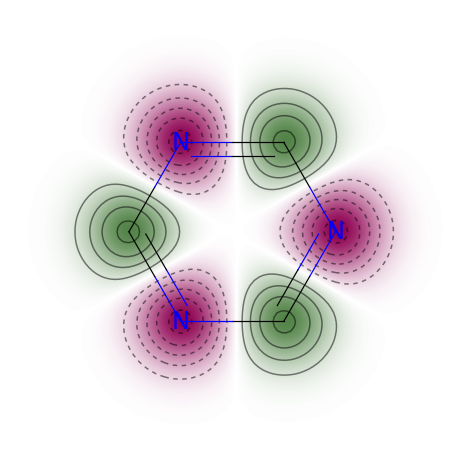

In [57]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol, ref_mol, 
                                                               SimilarityMaps.GetMorganFingerprint,)

Функция так же выводит макисмальны, нормализованный атомный вес

In [58]:
print(maxweight)

0.2777777777777778


То есть не нужно никакие принты заранее получать. Тип фингерпринтов указывается в функции

В данном случии молекулой рефернсом служит Бензол, а молекулой для которой рисутется карта похожести - 123-Триазин.

И по идеи зеленые участки - идентичные участки , а крансые - не похожие

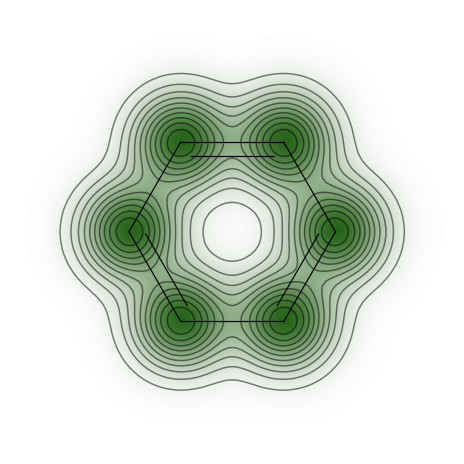

In [51]:
fg2 = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol, SimilarityMaps.GetMorganFingerprint)

У функции есть так же аргумет **metric** туда аписывается способ сравнения молекул по фингерпринтам. 

По дефолтут там `DataStructs.DiceSimilarity`

Но можно поставить и другой например `DataStructs.TanimotoSimilarity` или `.FingerpintSimilarity` `KazinskySimilarity`

In [53]:
from rdkit.Chem import DataStructs

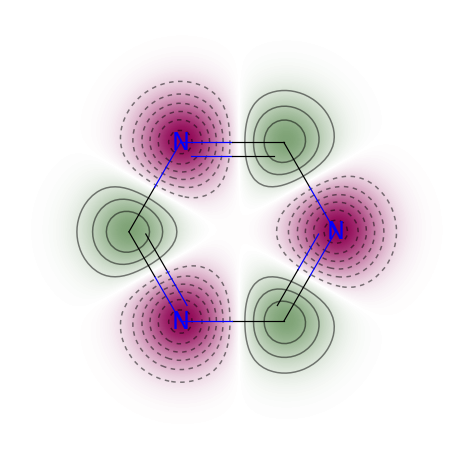

In [60]:
fig3 = SimilarityMaps.GetSimilarityMapForFingerprint(mol, ref_mol, 
                                              SimilarityMaps.GetMorganFingerprint, 
                                              metric=DataStructs.TanimotoSimilarity)

In [68]:
mol2 = Chem.MolFromSmiles("n1cnc(CC(=O)O)cn1")

(<Figure size 180x180 with 1 Axes>, 0.13186813186813184)

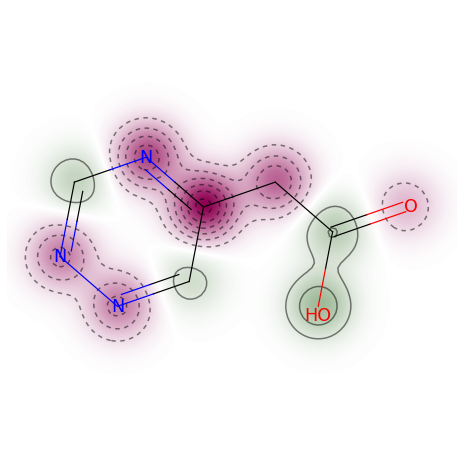

In [76]:
SimilarityMaps.GetSimilarityMapForFingerprint(mol, mol2, SimilarityMaps.GetMorganFingerprint)

(<Figure size 180x180 with 1 Axes>, 0.14604462474645033)

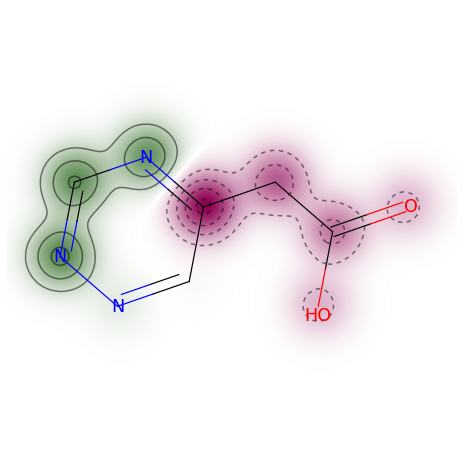

In [95]:
SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol2, SimilarityMaps.GetMorganFingerprint)